## Data Generator

In [1]:
import sys
print(sys.version)

2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import numpy as np
from utils.parser import parse_inputs    # Data handler for LISA dataset

training_instances = parse_inputs('../data/training.txt')
print("Train: {} samples\nNumber of classes:".format(len(training_instances)))

# Display few instances
for i in training_instances.keys()[0:5]:
    print(str(i).split('/')[-1], training_instances[i])

Train: 9924 samples
Number of classes:
('stop_1399493597.avi_image6.png', [[1125.5, 388.5, 75.0, 75.0, 'stop']])
('stop_1398985027.avi_image8.png', [[1149.0, 309.0, 124.0, 168.0, 'stop']])
('stopAhead_1323819280.avi_image6.png', [[190.0, 320.0, 34.0, 32.0, 'stopAhead']])
('keepRight_1323817562.avi_image3.png', [[194.5, 333.0, 27.0, 32.0, 'keepRight']])
('pedestrianCrossing_1333389971.avi_image15.png', [[566.5, 150.5, 41.0, 41.0, 'pedestrianCrossing']])


In [4]:
from utils.data_generator import flow_from_list
from cfg import *

data_gen   = flow_from_list(training_instances, batch_size=32)

Using TensorFlow backend.


In [5]:
images, labels  = data_gen.next()

print("Images shape {}".format(images[0].shape))
print("List of images : {}".format(np.shape(images)))
print("List of labels : {}\n".format(np.shape(labels)))

Images shape (608, 608, 3)
List of images : (32, 608, 608, 3)
List of labels : (32, 19, 19, 330)



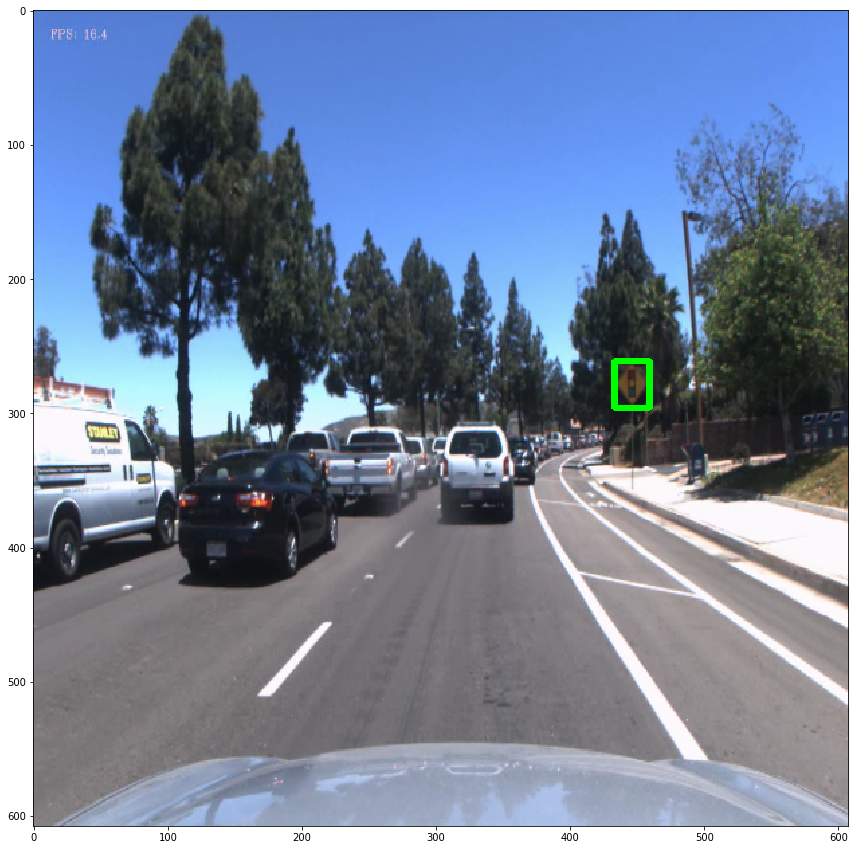

In [6]:
from utils.draw_boxes import draw, DrawingBox
from utils.box import Box
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
i = np.random.randint(0, len(images))
img = images[i]
label = labels[i]
height, width, _ = images[i].shape

def draw_box(img, bboxes):
    for bbox in bboxes:
        img = cv2.rectangle(img, bbox[0], bbox[1], color=[0, 1.0, 0], thickness=3)
    return img

def get_gt(label):
        
    tmp = label[label > 0.]
    bboxes = []
    if len(tmp[0:4]) == 0 :
        bbox = Box(0,0,0,0)
    else:
        for i in range(len(tmp)/(7*N_ANCHORS)):
            xc, yc, w ,h = tmp[tmp > 0][i*7*N_ANCHORS:i*7*N_ANCHORS + 4]
            bbox = Box(xc, yc, w ,h)
            bbox.to_abs_size((width, height))
            opencv_box = bbox.to_opencv_format()[0]
            bboxes.append(opencv_box)
    return bboxes

bboxes = get_gt(label)
plt.figure(figsize=(15, 15))
plt.imshow(draw_box(img, bboxes))

('Image size:', (608, 608, 3))


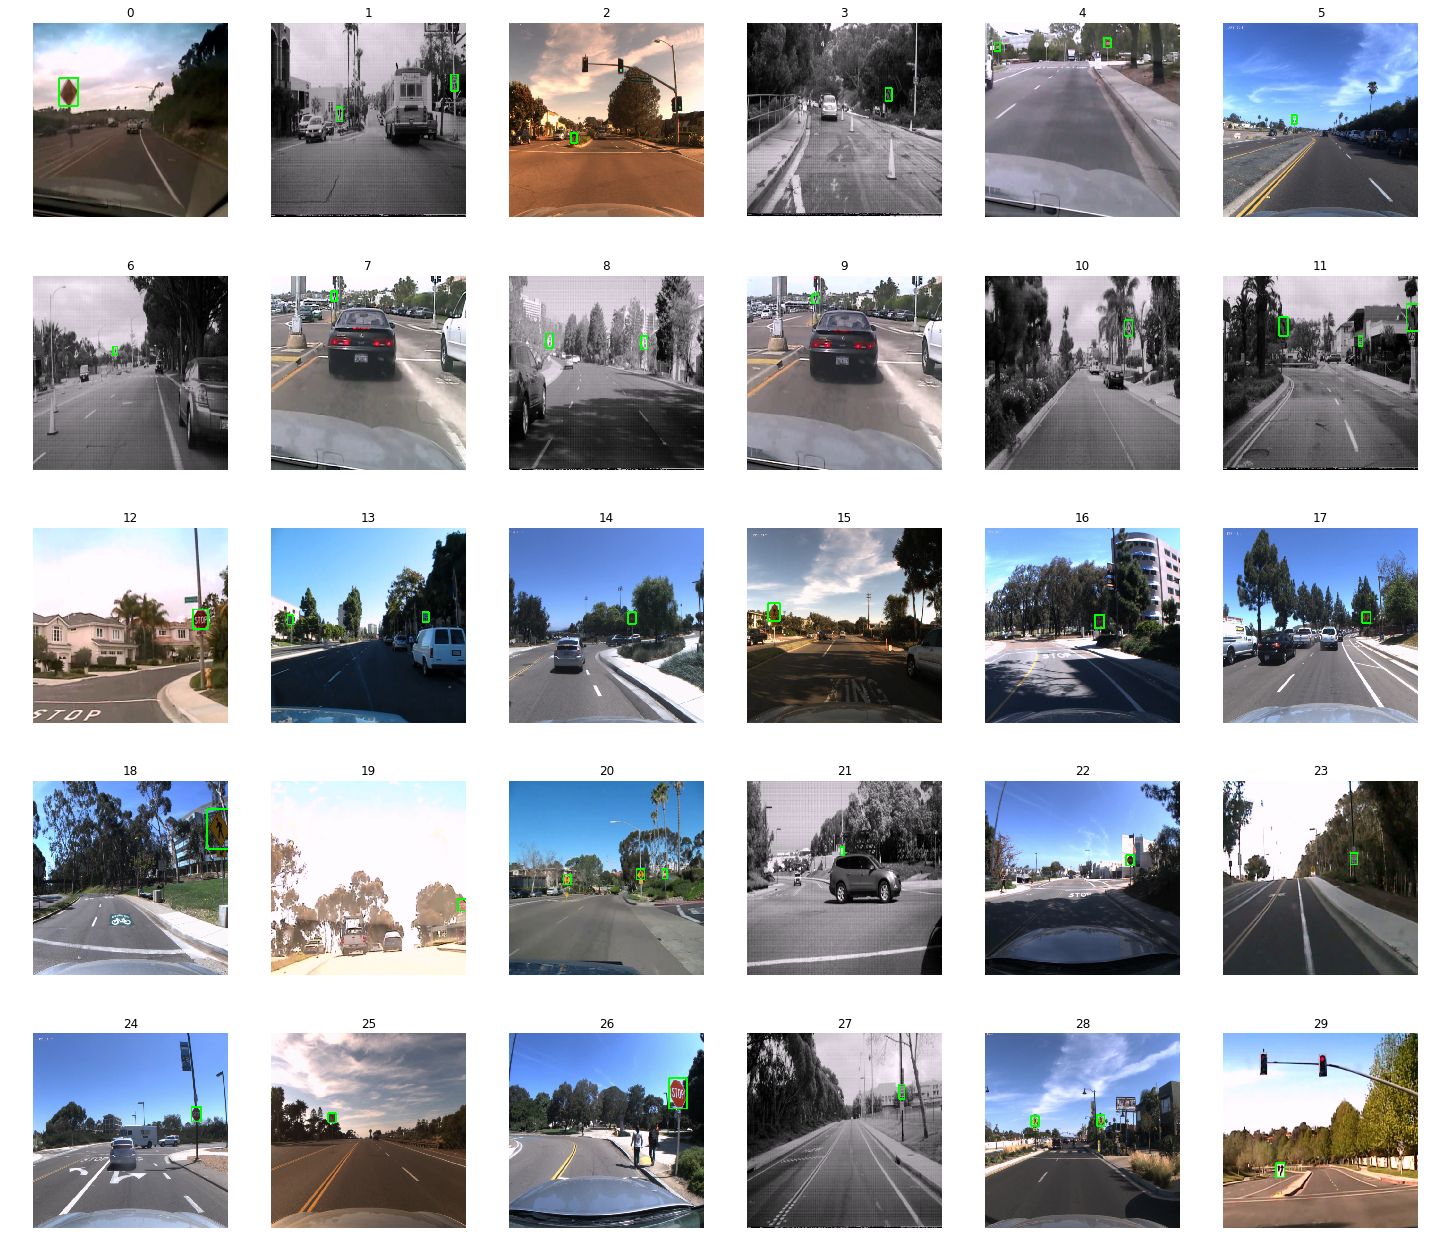

In [7]:
from utils.box import Box
import matplotlib.pyplot as plt
%matplotlib inline

row, col = 5, 6
fg, a    = plt.subplots(row, col, figsize =(20, 18))
fg.tight_layout()
height, width, _ = images[0].shape
print("Image size:", images[0].shape)
i        = 0
for r in range(row):
    for c in range(col):
        bboxes = get_gt(labels[i])
        a[r, c].axis('off')
        plt.tight_layout()
        a[r, c].imshow(draw_box(images[i], bboxes))
        a[r, c].set_title(str(i))
        i +=1